# Data exploration

The on-chain data could be downloaded from https://coinmetrics.io/. Even though there are hundreds of columns on the Ethereum on-chain data, some features have more impact on the price based on their mean of information. Their definitions are as follows:
- PriceUSD: Ethereum Price
- AdrActCnt: Number of active addresses
- AdrBal1in100MCnt: Number of addresses with balances greater than 100M 
- AdrBal1in10BCnt: Number of addresses with balances greater than 10B 
- AdrBal1in10MCnt: Number of addresses with balances greater than 10M 
- AdrBal1in1BCnt: Number of addresses with balances greater than 1B
- AdrBal1in1MCnt: Number of addresses with balances greater than 1M
- CapMrktCurUSD: Capitalization Market
- DiffLast: Last difficulty
- DiffMean: Mean difficulty
- FeeMedUSD: Median transaction fees
- FeeTotUSD: Total Fees
- FlowInExUSD: Exchanges In-flow
- FlowOutExUSD: Exchanges Out-flow
- GasUsedTx: Gas used per transaction
- GasUsedTxMean: Mean gas used per transaction
- HashRate: Network hashrate (computing power)
- RevHashNtv: Revenue per hash unit
- RevHashRateUSD: Daily revenue per hash unit per second, USD
- SplyAdrBalUSD1M: Supply in addresses with balances greater than $1M
- TxCnt: Number of transactions
- TxTfrValMedUSD: Median transactions transfer value

The methods used in this project can be used to predict any cryptocurrency with any time steps as long as the on-chain data is available. At first, we need to import some packages to load and explore data.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Create some flot functions we are going to use

In [2]:
def plot_one(df, feature):    
    """
    Plot one feature or label
    """
    plt.figure(figsize = (14,7))
    plt.plot(df[feature])
    plt.xticks(range(0, data_raw.shape[0],60), df['date'].loc[::60], rotation=45)
    plt.title("Ethereum Price", fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Price (USD)', fontsize=18)
    plt.show()

In [3]:
def plot_multi_features(df_plot, features):
    
    """
    Plot multiple features of the dataset
    """
    
    df_plot = df_plot[features]
    list_length = df_plot.shape[1]

    ncols = 2
    nrows = int(round(list_length / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 35))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        plt.xticks(range(0, data_raw.shape[0],120), data_raw['date'].loc[::120], rotation=45)
    fig.tight_layout()
    plt.show()

### Data loading and exploration

##### Load full on-chain data of Ethereum

In [4]:
data_raw = pd.read_csv('data/eth_full.csv')
data_raw

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2015-07-30,9206,5685,9203,9203,1237,9151,9203,145,8094,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,2015-07-31,424,5692,9359,9359,1238,9278,9359,145,8152,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,2015-08-01,413,5699,9474,9474,1238,9368,9474,145,8188,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
3,2015-08-02,432,5708,9561,9561,1238,9456,9561,145,8223,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
4,2015-08-03,444,5715,9637,9637,1237,9520,9637,145,8262,...,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,2021-11-15,606036,5555,1166692,18202185,1054,241239,5573039,122,36595,...,982959,4.042151e+06,1.847024e+10,4.633764,21173.555519,0.100000,456.940777,19.766965,0.050296,0.031307
2301,2021-11-16,609879,5560,1165639,18237665,1055,240967,5580973,122,36564,...,974113,2.945195e+06,1.247034e+10,3.810882,16135.776589,0.100000,423.413146,19.753756,0.050208,0.034703
2302,2021-11-17,695412,5566,1167736,18217312,1057,241192,5589438,122,36563,...,1073169,2.472869e+06,1.054827e+10,3.008266,12832.058578,0.074978,319.823949,19.685509,0.049056,0.034328
2303,2021-11-18,591159,5566,1170963,18239379,1066,241438,5599347,120,36605,...,972016,2.779087e+06,1.107654e+10,3.730401,14868.163187,0.100106,398.991334,19.650456,0.049240,0.036280


In [5]:
imp_features = ['date', 'PriceUSD', 'AdrActCnt', 'AdrBal1in100MCnt',
       'AdrBal1in10BCnt', 'AdrBal1in10MCnt', 'AdrBal1in1BCnt',
       'AdrBal1in1MCnt', 'CapMrktCurUSD', 'DiffLast',
       'DiffMean', 'FeeMedUSD', 'FeeTotUSD', 'FlowInExUSD',
       'FlowOutExUSD', 'GasUsedTx', 'GasUsedTxMean', 'HashRate',
       'RevHashNtv', 'RevHashRateUSD',
       'SplyAdrBalUSD1M', 'TxCnt', 'TxTfrValMedUSD']

data = data_raw[imp_features]
data

,date,PriceUSD,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1MCnt,CapMrktCurUSD,DiffLast,...,FlowInExUSD,FlowOutExUSD,GasUsedTx,GasUsedTxMean,HashRate,RevHashNtv,RevHashRateUSD,SplyAdrBalUSD1M,TxCnt,TxTfrValMedUSD
0,2015-07-30,NaN,9206,9203,9203,9151,9203,8094,NaN,338279223318,...,NaN,NaN,0,NaN,0.027212,16.720192,NaN,NaN,0,NaN
1,2015-07-31,NaN,424,9359,9359,9278,9359,8152,NaN,823192697153,...,NaN,NaN,0,NaN,0.047934,8.738876,NaN,NaN,0,NaN
2,2015-08-01,NaN,413,9474,9474,9368,9474,8188,NaN,956650629556,...,NaN,NaN,0,NaN,0.054347,5.899579,NaN,NaN,0,NaN
3,2015-08-02,NaN,432,9561,9561,9456,9561,8223,NaN,1102546374148,...,NaN,NaN,0,NaN,0.063287,5.162282,NaN,NaN,0,NaN
4,2015-08-03,NaN,444,9637,9637,9520,9637,8262,NaN,1154731637775,...,NaN,NaN,0,NaN,0.068813,4.705585,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,2021-11-15,4569.407770,606036,1166692,18202185,241239,5573039,36595,5.367033e+11,11263394429417836,...,8.676790e+08,1.029855e+10,97422476367,75542.615410,817.739849,0.000213,84078.925802,1.025092e+08,1289636,456.940777
2301,2021-11-16,4234.131465,609879,1165639,18237665,240967,5580973,36564,4.973249e+11,10918227329653401,...,1.755198e+09,1.678261e+09,96356492010,73545.984332,793.794054,0.000219,80290.211052,1.022489e+08,1310153,423.413146
2302,2021-11-17,4265.599006,695412,1167736,18217312,241192,5589438,36563,5.010266e+11,11549986846583558,...,1.167281e+09,1.282525e+09,98477697827,72772.919850,830.259240,0.000207,76139.406528,1.022624e+08,1353219,319.823949
2303,2021-11-18,3985.674373,591159,1170963,18239379,241438,5599347,36605,4.681491e+11,11579207148357743,...,1.555602e+09,1.424465e+09,98258045079,76510.060408,851.155962,0.000203,69860.008277,1.019504e+08,1284250,398.991334


#### Check missing data

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of Missing Data'])
missing_data

,Total,Percent of Missing Data
FeeMedUSD,9,0.003905
CapMrktCurUSD,9,0.003905
SplyAdrBalUSD1M,9,0.003905
RevHashRateUSD,9,0.003905
FlowOutExUSD,9,0.003905
FlowInExUSD,9,0.003905
FeeTotUSD,9,0.003905
PriceUSD,9,0.003905
TxTfrValMedUSD,9,0.003905
GasUsedTxMean,8,0.003471


##### Preprocessing: drop the rows where at least one element is missing.

In [7]:
data.dropna(inplace=True)

#### Plot the Ethereum Price over time

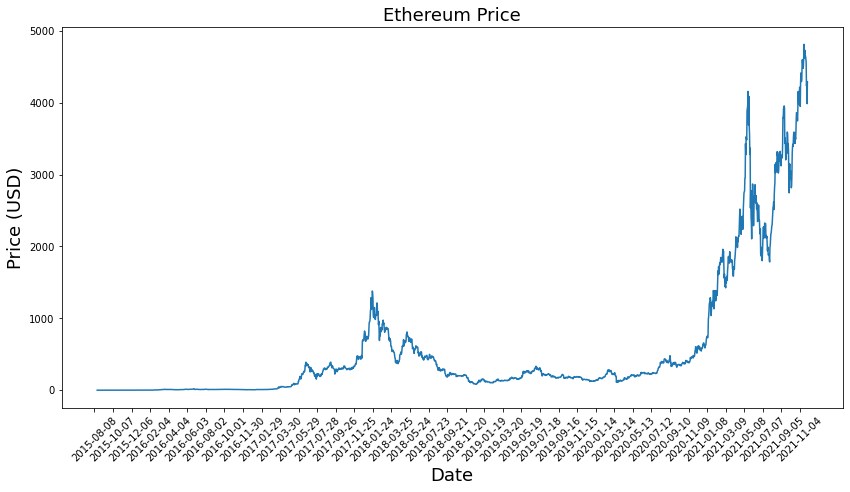

In [8]:
plot_one(data,'PriceUSD')

- Visualize the moving average smoothing using window length 3, 7, 50, 100 and log transformation

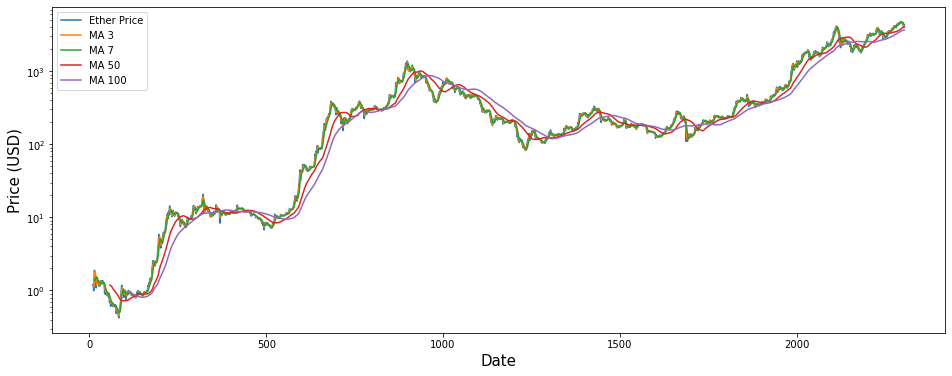

In [9]:
ma_3 = data['PriceUSD'].rolling(window=3).mean()
ma_7 = data['PriceUSD'].rolling(window=7).mean()
ma_50 = data['PriceUSD'].rolling(window=50).mean()
ma_100 = data['PriceUSD'].rolling(window=100).mean()

plt.figure(figsize = (16,6))
data['PriceUSD'].plot(label='PriceUSD')
ma_3.plot(label='7 DMA')
ma_7.plot(label='50 DMA')
ma_50.plot(label='100 DMA')
ma_100.plot(label='200 DMA')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price (USD)',fontsize=15)
plt.legend(["Ether Price","MA 3", "MA 7", "MA 50", "MA 100"], loc="upper left")

plt.yscale('log')

plt.show()

#### Visualize important features

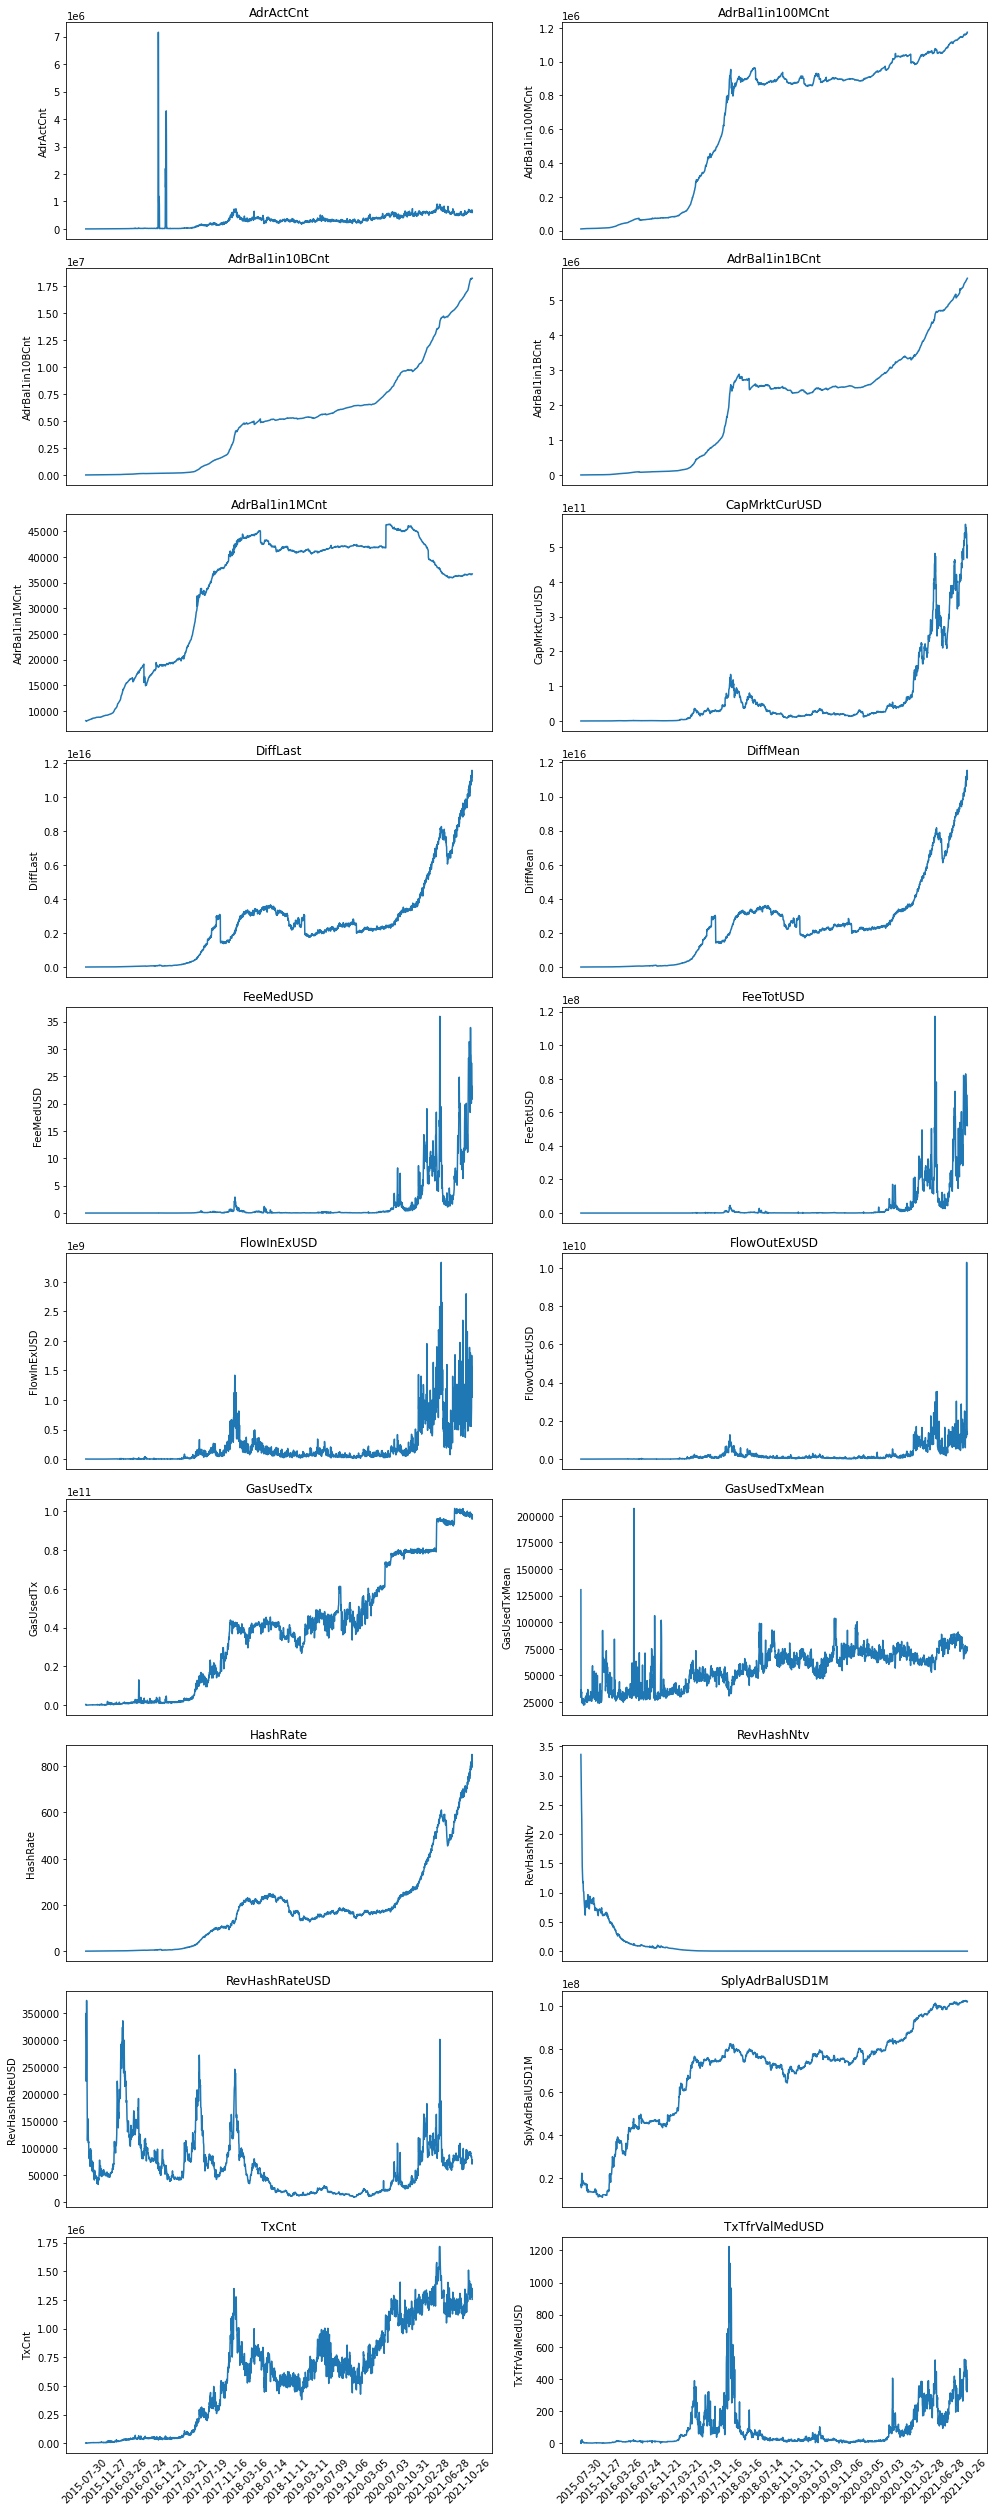

In [10]:
features_plot = ['AdrActCnt', 'AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBal1in1BCnt', 'AdrBal1in1MCnt', 'CapMrktCurUSD', 'DiffLast', 'DiffMean', 'FeeMedUSD', 'FeeTotUSD',
       'FlowInExUSD', 'FlowOutExUSD', 'GasUsedTx', 'GasUsedTxMean', 'HashRate',
       'RevHashNtv', 'RevHashRateUSD', 'SplyAdrBalUSD1M',
       'TxCnt', 'TxTfrValMedUSD']

plot_multi_features(data, features_plot)

##### Export the clean data for further using

In [11]:
data.to_csv('data/eth_clean.csv')
data.shape

(2296, 23)